# Plot Attrib Perf and historical risk

In [8]:
from IPython.display import display
from updPosesTL import getPosesRT, cnxr
import pandas as pd

import matplotlib.pyplot  as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox

%matplotlib inline

Toggle output scrolling of selected cells

In [105]:
Fund = 'DGA'
AUM = 83_460_000

flds = ['Asset', 'PM', 'PtfId', ]
fldsComp = ['PlEur', 'DeltaEur', 'GammaEur', 'BpvEur']

print(f'Loading Current Ptf at {pd.datetime.today()}')
df = getPosesRT(cnxr)[lambda x: (x.Fund== Fund) & (x.PM != 'PTF')]

Loading Current Ptf at 2018-07-12 19:59:30.220722


In [106]:
df.loc[:, fldsComp] = df.loc[:, fldsComp] / AUM
#df.PlEur *= 1e4

In [83]:
def wSelectMultiple(df, fields):
    return {fld: widgets.SelectMultiple(options= ['ALL'] + elts, 
                                        value= ['ALL'],
                                        rows= min(len(elts)+1, 8),
                                        description= fld)
                    for fld, elts in 
                        ((fld, list(df[fld].sort_values().unique())) for fld in fields)}

In [100]:
wSel = wSelectMultiple(df, flds)
wFields = widgets.ToggleButtons(options= fldsComp, description='Fields', tooltips=[],)
wV = widgets.ToggleButtons(options= flds + ['Code'], description='Select Vertical field', tooltips=[],)
wH = widgets.ToggleButtons(options= flds + ['Code'], description='Select Horizontal field', tooltips=[],)

In [108]:
def plot_filtered(field= wFields, fldH= wH, fldV= wV, **kwargs):
    if fldH == fldV:
        return

    global select
    flds = {fld: values for fld, values in kwargs.items() if not 'ALL' in values}
    for fld, values in flds.items():
        if isinstance(values, str):
            values = [values]
        if 'mask' in locals(): 
            mask = mask & df[fld].isin(values)
        else:
            mask = df[fld].isin(values)
    
    if flds:
        select = df[mask]
    else:
        select = df
        
    select = select.groupby([fldV, fldH])[field].sum().unstack()
    f, ax = plt.subplots(figsize= (12,8))
    sns.heatmap(select, ax= ax, cmap= cmap2, linewidths=0.5, square= False, robust= True, center= 0.0, annot= True, fmt= '.2%')
    #display(select.head(10))
    return kwargs

    if select.empty or not select.any().any():
        plt.gca().remove();
    else:
        ax= select.plot(figsize= (16, 9), title= field)
        ax.yaxis.tick_right()
        ax.hlines(0, *ax.xaxis.get_data_interval(), linewidth = 2.0, color='r');
        
    return kwargs
w = widgets.interactive(plot_filtered, **wSel)

In [109]:
display(VBox([widgets.Label('Please select filters'),
              HBox(list(wSel.values())),
              wFields,
              HBox([wV, wH]),
              w.children[-1]]))

In [79]:
select

PM,CHC,MLB,TAB
Code,,,
ES,-66559.829060,-598.290598,-6805.555556
FTSMIB,NaN,NaN,29625.000000
IB,12580.000000,NaN,NaN
MES,57115.384615,NaN,NaN
NDX,NaN,0.000000,-115256.410256
NH,NaN,NaN,-61301.657627
NKY,NaN,NaN,-11744.710106
OMX,NaN,NaN,-37781.927465
SMI,NaN,NaN,28626.921854


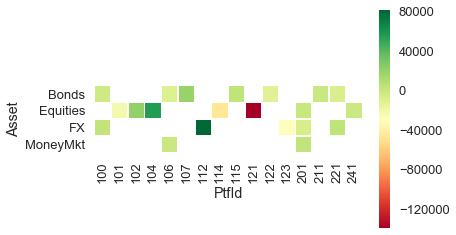

In [60]:
cmap1 = sns.diverging_palette(150, 10, as_cmap=True)
cmap2 = 'RdYlGn'
cmap3 = 'PuOr_r'
sns.heatmap(select, cmap= cmap2, linewidths=0.5, square= True)